**Import packages and dataset**

In [431]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn import tree
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [432]:
abalone_data = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
names =  ["Sex", "Length", "Diameter", "Height", 
          "Whole Weight", "Shucked Weight", "Viscera Weight", 
          "Shell Weight", "Rings"]
abalone_df = pd.read_csv(abalone_data, 
                      header=None, 
                      names = names)

In [433]:
abalone_df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


**Exploratory Data Analysis**

In [434]:
abalone_df.count()

Sex               4177
Length            4177
Diameter          4177
Height            4177
Whole Weight      4177
Shucked Weight    4177
Viscera Weight    4177
Shell Weight      4177
Rings             4177
dtype: int64

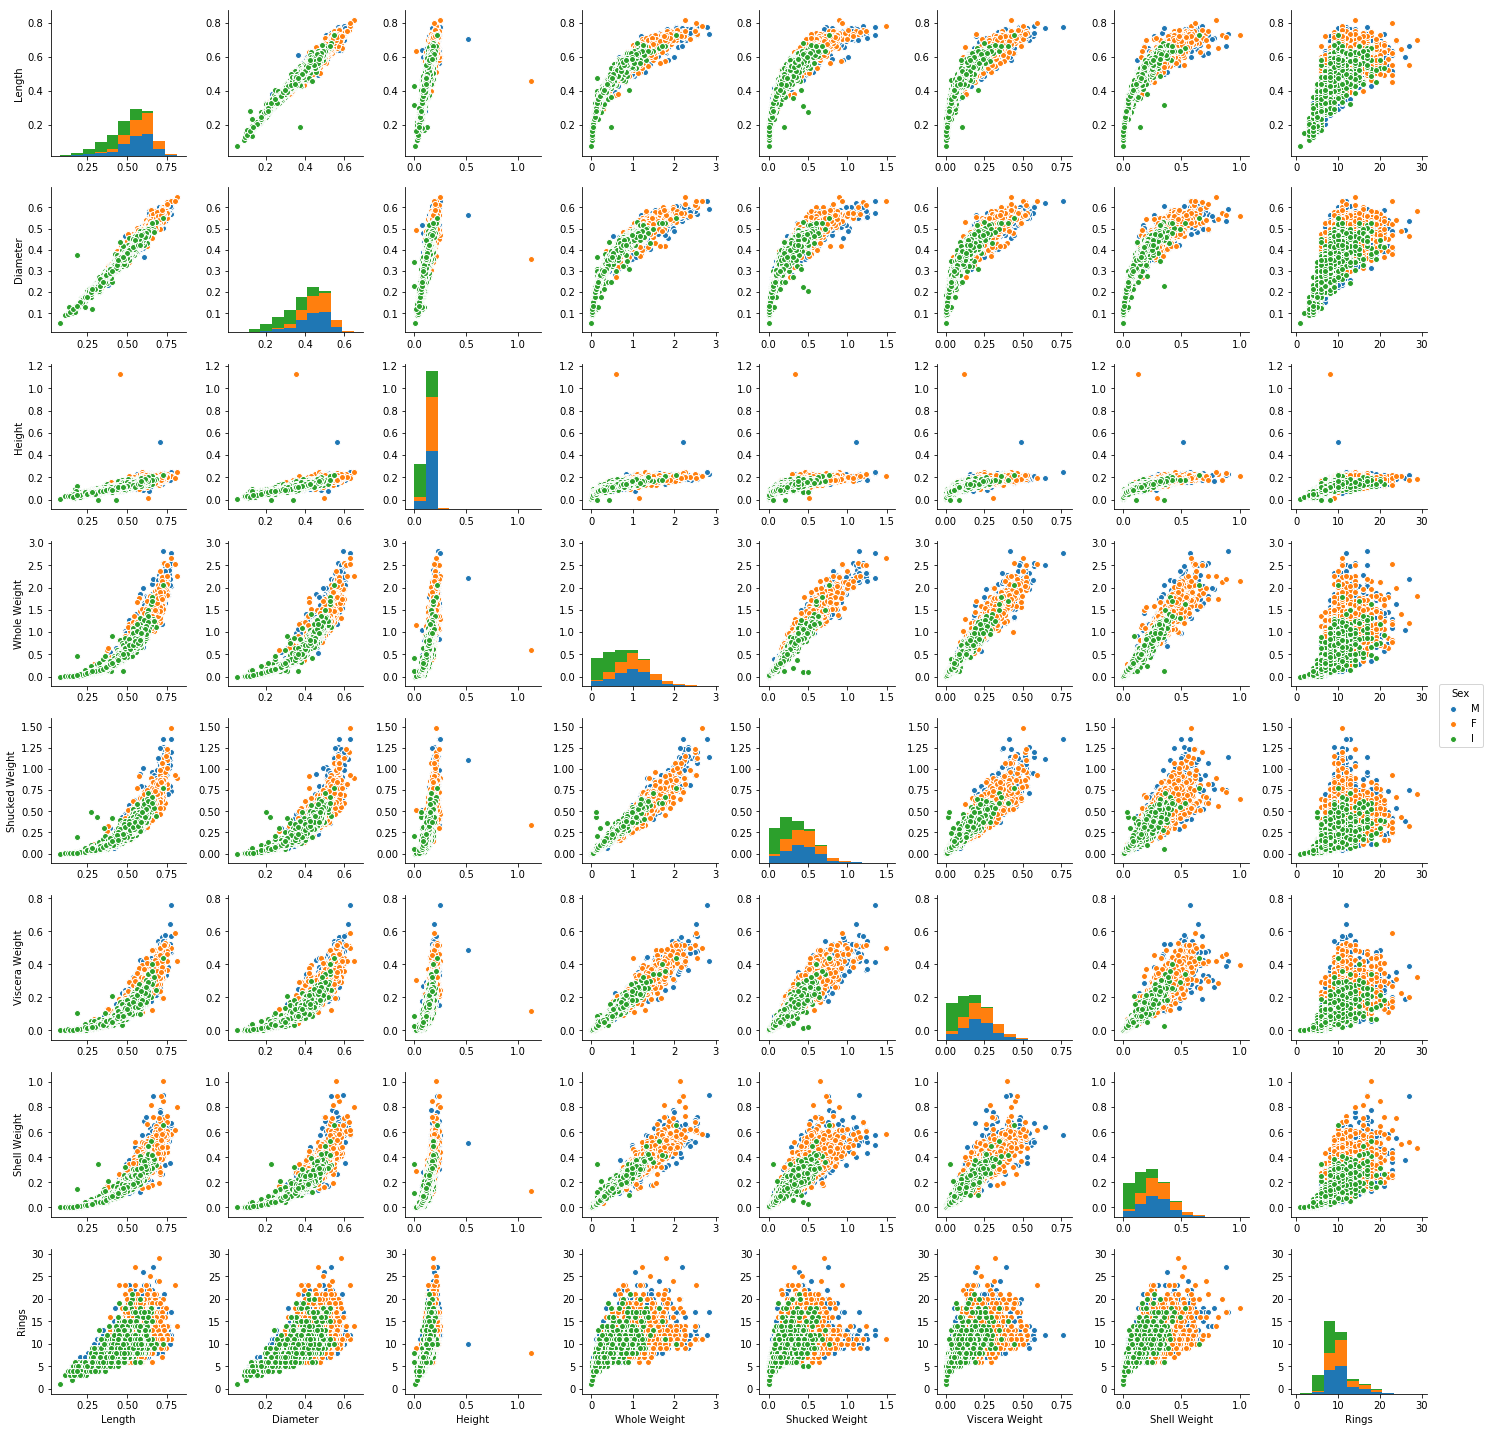

In [435]:
sns.pairplot(abalone_df, hue='Sex')
plt.show()

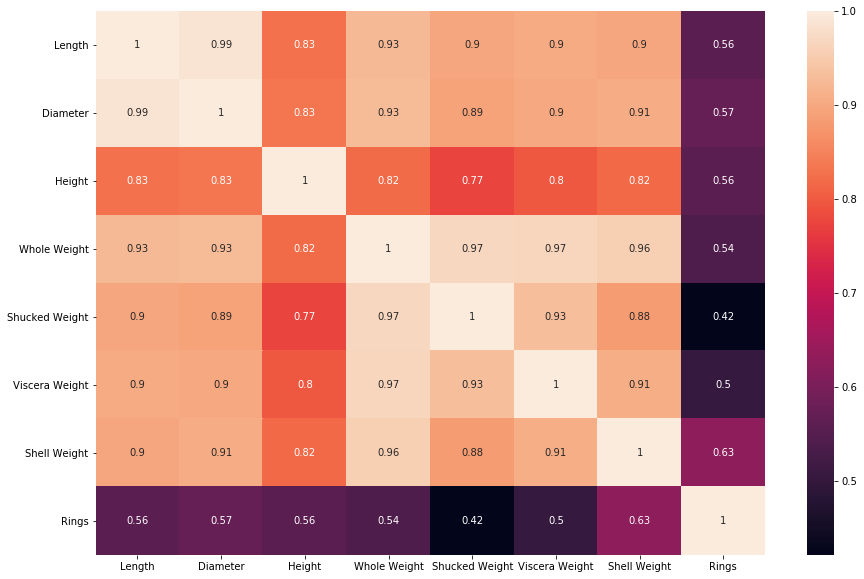

In [436]:
plt.subplots(figsize=(15,10))
sns.heatmap(abalone_df.corr(), annot=True)
plt.show()

In [437]:
abalone_df.corr()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole Weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked Weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera Weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell Weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [438]:
abalone_df.groupby('Sex').mean()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
Sex,,,,,,,,
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,11.129304
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,7.890462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,10.705497


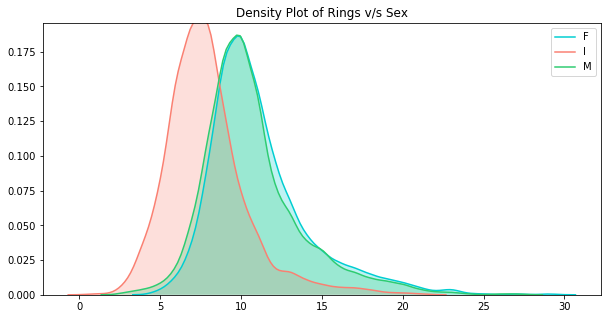

In [439]:
plt.figure(figsize=(10,5))
sns.kdeplot(abalone_df["Rings"][abalone_df.Sex == 'F'], color="darkturquoise", shade=True)
sns.kdeplot(abalone_df["Rings"][abalone_df.Sex == 'I'], color="salmon", shade=True)
sns.kdeplot(abalone_df["Rings"][abalone_df.Sex == 'M'], color="#2ecc71", shade=True)
plt.legend(['F', 'I', 'M'])
plt.title('Density Plot of Rings v/s Sex')
plt.show()

**Data Transformation**

In [440]:
le = preprocessing.LabelEncoder()
abalone_df.Sex = le.fit_transform(abalone_df.Sex)

In [441]:
abalone_df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [442]:
abalone_df['Diameter_Length_Rate'] = abalone_df.Diameter/abalone_df.Length

In [443]:
# abalone_df.drop(['Diameter','Length'], axis=1, inplace=True)

In [444]:
abalone_df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings,Diameter_Length_Rate
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0.802198
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0.757143
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0.792453
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0.829545
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0.772727


**Split train and test dataset**

In [445]:
x = abalone_df.loc[:,'Length':'Diameter_Length_Rate']
y = abalone_df.loc[:,'Sex']

In [446]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

**SVC Model**

In [447]:
svc_model = svm.SVC(kernel='rbf', gamma=0.001,C=5)
svc_model.fit(x_train, y_train)
y_pred = svc_model.predict(x_test)
svc_model.score(x_train, y_train)

0.5354088265480671

In [448]:
accuracy_score(y_test,y_pred)

0.53588516746411485

**Decision Tree**

In [449]:
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)
dt_model.score(x_train, y_train)

1.0

In [450]:
accuracy_score(y_test, y_pred)

0.48963317384370014

**Logistic Regression**

In [451]:
log_model = LogisticRegression(penalty='l2')
log_model.fit(x_train, y_train)
y_pred = log_model.predict(x_test)
log_model.score(x_train, y_train)

0.54875128292849806

In [452]:
accuracy_score(y_test, y_pred)

0.56220095693779903